# MED-PC Data Processing Notebook

## Importing the Python Libraries

In [1]:
import sys
import glob
from collections import defaultdict
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from medpc2excel.medpc_read import medpc_read

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
# All the libraries that were created for this repository
import extract.dataframe
import processing.tone
import extract.metadata

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (10,6)

## Getting the Metadata from all the MED-PC Recording Files

- Getting all the file paths

In [6]:
all_med_pc_file = glob.glob("./data/timestamp_dataframes/*.txt")

In [7]:
all_med_pc_file[:10]

['./data/timestamp_dataframes/2022-05-06_12h59m_Subject 3.4 (2).txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-05-10_14h40m_Subject 4.3 (3).txt',
 './data/timestamp_dataframes/2022-05-06_12h59m_Subject 4.3 (3).txt',
 './data/timestamp_dataframes/2022-05-04_08h43m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-05-03_12h52m_Subject 2.1.txt',
 './data/timestamp_dataframes/2022-05-04_10h11m_Subject 1.2.txt',
 './data/timestamp_dataframes/2022-05-12_10h22m_Subject 1.2.txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 1.1.txt',
 './data/timestamp_dataframes/2022-05-12_10h22m_Subject 1.3.txt']

- Example of what the MED-PC Recording file looks like

In [8]:
with open(all_med_pc_file[0]) as f:
    lines = f.readlines()
    for line in lines[:20]:
        print(line)

File: C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (2).txt







Start Date: 05/06/22

End Date: 05/06/22

Subject: 3.4 (2)

Experiment: Pilot of Pilot

Group: Cage 4

Box: 1

Start Time: 12:59:58

End Time: 14:02:38

MSN: levelNP_CS_reward_laserepochON1st_noshock

A:    4299.000

D:    9000.000

F:    2000.000

G:       0.000

H:       0.000

I:       0.000

L:       0.000



- We will be extracting the first 10 or so lines that look like:

```
File: C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (2).txt

Start Date: 05/06/22

End Date: 05/06/22

Subject: 3.4 (2)

Experiment: Pilot of Pilot

Group: Cage 4

Box: 1

Start Time: 12:59:58

End Time: 14:02:38

MSN: levelNP_CS_reward_laserepochON1st_noshock
```
    
- We will just find all the lines that start with "File", "Start Date", "End Date", "Subject", "Experiment", "Group", "Box", "Start Time", "End Time", or "MSN". And then stop once all the metadata types have been collected

In [9]:
# This makes a nested dictionary of file paths to each individual metadata type
file_path_to_meta_data = extract.metadata.get_all_med_pc_meta_data_from_files(list_of_files=all_med_pc_file)

In [10]:
for key, value in file_path_to_meta_data.items():
    print("File path: {}".format(key))
    print("Metadata types and associated values: {}".format(value))
    break

File path: ./data/timestamp_dataframes/2022-05-06_12h59m_Subject 3.4 (2).txt
Metadata types and associated values: {'File': 'C:\\MED-PC\\Data\\2022-05-06_12h59m_Subject 3.4 (2).txt', 'Start Date': '05/06/22', 'End Date': '05/06/22', 'Subject': '3.4 (2)', 'Experiment': 'Pilot of Pilot', 'Group': 'Cage 4', 'Box': '1', 'Start Time': '12:59:58', 'End Time': '14:02:38', 'MSN': 'levelNP_CS_reward_laserepochON1st_noshock'}


## Making a Dataframe out of the Metadata

In [11]:
# Turning the dictionary into a Pandas Dataframe
metadata_df = pd.DataFrame.from_dict(file_path_to_meta_data, orient="index")
# Resetting the index because currently the file path is the index 
metadata_df = metadata_df.reset_index()

In [12]:
metadata_df.head()

,index,File,Start Date,End Date,Subject,Experiment,Group,Box,Start Time,End Time,MSN
0,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock
1,./data/timestamp_dataframes/2022-05-06_08h37m_...,C:\MED-PC\Data\2022-05-06_08h37m_Subject 2.3.txt,05/06/22,05/06/22,2.3,Pilot of Pilot,Cage 1,1,08:37:09,09:53:25,levelNP_CS_reward_laserepochON1st_noshock
2,./data/timestamp_dataframes/2022-05-10_14h40m_...,C:\MED-PC\Data\2022-05-10_14h40m_Subject 4.3 (...,05/10/22,05/10/22,4.3 (3),Pilot of Pilot,Cage 4,2,14:40:24,15:43:18,levelNP_CS_reward_laserepochON1st_noshock
3,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 4.3 (...,05/06/22,05/06/22,4.3 (3),Pilot of Pilot,Cage 4,2,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock
4,./data/timestamp_dataframes/2022-05-04_08h43m_...,C:\MED-PC\Data\2022-05-04_08h43m_Subject 2.3.txt,05/04/22,05/04/22,2.3,Pilot of Pilot,Cage 1,3,08:43:11,09:54:22,levelNP_CS_reward_laserepochON1st_noshock


In [116]:
metadata_df["cage"] = metadata_df["Group"].apply(lambda x: x.strip("Cage").strip())

In [13]:
# How many files there are for each subject
metadata_df.groupby("Subject").count()

,index,File,Start Date,End Date,Experiment,Group,Box,Start Time,End Time,MSN
Subject,,,,,,,,,,
1.1,11,11,11,11,11,11,11,11,11,11
1.2,11,11,11,11,11,11,11,11,11,11
1.3,11,11,11,11,11,11,11,11,11,11
1.4,11,11,11,11,11,11,11,11,11,11
2.1,12,12,12,12,12,12,12,12,12,12
2.2,11,11,11,11,11,11,11,11,11,11
2.3,11,11,11,11,11,11,11,11,11,11
2.4,11,11,11,11,11,11,11,11,11,11
3.1 (1),10,10,10,10,10,10,10,10,10,10


In [14]:
metadata_df.to_csv("./data/metadata_cage_1_2_3_4_date_20220503_20220512.csv")
metadata_df.to_excel("./data/metadata_cage_1_2_3_4_date_20220503_20220512.xlsx")

## Inputting all the MED-PC log files

- Example of what the MED-PC Script looks like that was ran when recording the behaviors

In [15]:
with open("./scripts/levelNP_CS_reward_laserepochON1st_noshock.MPC") as f:
    lines = f.readlines()
    for line in lines[:100]:
        print(line)

\v3 stop tone with poke

\v3.2 monitor port entries AND exits



\INPUTS

^port = 8



\OUTPUTS

^fan = 16

^houselight = 11

^tone1 = 2

^tone2 = 3

^tone3 = 4

^tone4 = 5

^pump = 9

^whitenoise = 1

^laser=10

^csout = 5

^peout = 15

^cs1out = 12

^cs2out = 13

^cs3out = 14



\EXP SETTINGS

^ncsNoShock = 0

^initCS1trials = 3



\ARRAYS

DIM P = 20000 \Port entry time stamp array

DIM Q = 2500 \US delivery time stamp array (absolute)

DIM R = 2500 \US time stamp array (relative to last CS)

DIM W = 2500 \ITI values used for CS

DIM S = 2500 \CS presentation values (absolute - every time light turns on)

DIM N = 20000 \Port exit time stamp array

DIM K = 2500 \CS type

DIM B = 2500 \shock intensity



LIST V = 30", 30", 30", 30", 100", 95", 90", 80", 90", 100", 90", 120", 90", 85", 90", 95", 120", 80", 95", 80", 90", 80", 75", 100", 95", 90", 80", 90", 100", 90", 120", 90", 85", 90", 95", 90", 80", 90", 100", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90", 90"

- We will be using the comments in the MED-PC script(which starts with the `\`) to create a name for the variables. By default, MED-PC uses a single letter as the name of the variable.
    - This will use the medpc2excel library found in https://github.com/cyf203/medpc2excel
- Example of the comments in the MED-PC script that we will use the names from:

```
\Variables

\A - Time since last CS

\B - Shock intensity

\C - Counter array

\D - Current ITI value

\E - CS ITI values for first few trials

\F - Shock duration

\G -

\H -

\I -

\J - Shock intensity repo

\K - CS type

\L -

\M - CS type repo

\N - Port exit time stamp array

\O -

\P - Port entry time stamp array

\Q - Sucrose delivery time stamp array (absolute)

\R - Sucrose delivery time stamp array (relative to last CS)

\S - CS presentation time stamp array

\T - Session timer

\U - Time since last CS presentation

\V - List of CS ITI values (tone + houselight)

\W - ITI values used for CS one each trial

\X -

\Y - Beam break monitor variable

\Z -
```

In [16]:
with open(all_med_pc_file[0]) as f:
    lines = f.readlines()
    for line in lines[:20]:
        print(line)

File: C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (2).txt







Start Date: 05/06/22

End Date: 05/06/22

Subject: 3.4 (2)

Experiment: Pilot of Pilot

Group: Cage 4

Box: 1

Start Time: 12:59:58

End Time: 14:02:38

MSN: levelNP_CS_reward_laserepochON1st_noshock

A:    4299.000

D:    9000.000

F:    2000.000

G:       0.000

H:       0.000

I:       0.000

L:       0.000



- **Please make sure that the corresponding `.mpc` file (aka the MED-PC script) that was ran to create the log file, is also in the same folder**

In [17]:
concatted_medpc_df = extract.dataframe.get_medpc_dataframe_from_list_of_files(medpc_files=all_med_pc_file)

Traceback (most recent call last):
  File "/home/riwata/Projects/med_pc_repo/results/2022_05_02_log_processing/../../src/extract/dataframe.py", line 71, in get_medpc_dataframe_from_list_of_files
    ts_df, medpc_log = medpc_read(file=file_path, override=True, replace=False)
  File "/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2excel/medpc_read.py", line 114, in medpc_read
    temp += re.split('\s+',d.split(':')[1])
IndexError: list index out of range

Invalid Formatting for file: ./data/timestamp_dataframes/2022-05-03_13h19m_Subject 1.2.txt
Traceback (most recent call last):
  File "/home/riwata/Projects/med_pc_repo/results/2022_05_02_log_processing/../../src/extract/dataframe.py", line 71, in get_medpc_dataframe_from_list_of_files
    ts_df, medpc_log = medpc_read(file=file_path, override=True, replace=False)
  File "/home/riwata/Projects/med_pc_repo/bin/conda_environments/env/med_pc_env/lib/python3.9/site-packages/medpc2exce

In [102]:
metadata_df


,index,File,Start Date,End Date,Subject,Experiment,Group,Box,Start Time,End Time,MSN,Group_processed
0,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
1,./data/timestamp_dataframes/2022-05-06_08h37m_...,C:\MED-PC\Data\2022-05-06_08h37m_Subject 2.3.txt,05/06/22,05/06/22,2.3,Pilot of Pilot,Cage 1,1,08:37:09,09:53:25,levelNP_CS_reward_laserepochON1st_noshock,1
2,./data/timestamp_dataframes/2022-05-10_14h40m_...,C:\MED-PC\Data\2022-05-10_14h40m_Subject 4.3 (...,05/10/22,05/10/22,4.3 (3),Pilot of Pilot,Cage 4,2,14:40:24,15:43:18,levelNP_CS_reward_laserepochON1st_noshock,4
3,./data/timestamp_dataframes/2022-05-06_12h59m_...,C:\MED-PC\Data\2022-05-06_12h59m_Subject 4.3 (...,05/06/22,05/06/22,4.3 (3),Pilot of Pilot,Cage 4,2,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
4,./data/timestamp_dataframes/2022-05-04_08h43m_...,C:\MED-PC\Data\2022-05-04_08h43m_Subject 2.3.txt,05/04/22,05/04/22,2.3,Pilot of Pilot,Cage 1,3,08:43:11,09:54:22,levelNP_CS_reward_laserepochON1st_noshock,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,./data/timestamp_dataframes/2022-05-04_08h42m_...,C:\MED-PC\Data\2022-05-04_08h42m_Subject 1.1.txt,05/04/22,05/04/22,1.1,Pilot of Pilot,Cage 1,1,08:42:53,09:54:22,levelNP_CS_reward_laserepochON1st_noshock,1
165,./data/timestamp_dataframes/2022-05-07_13h54m_...,C:\MED-PC\Data\2022-05-07_13h54m_Subject 4.3 (...,05/07/22,05/07/22,4.3 (3),Pilot of Pilot,Cage 4,3,13:54:26,14:55:23,levelNP_CS_reward_laserepochON1st_noshock,4
166,./data/timestamp_dataframes/2022-05-09_09h48m_...,C:\MED-PC\Data\2022-05-09_09h48m_Subject 1.1.txt,05/09/22,05/09/22,1.1,Pilot of Pilot,Cage 1,2,09:48:49,11:00:54,levelNP_CS_reward_laserepochON1st_noshock,1
167,./data/timestamp_dataframes/2022-05-10_10h42m_...,C:\MED-PC\Data\2022-05-10_10h42m_Subject 2.1.txt,05/10/22,05/10/22,2.1,Pilot of Pilot,Cage 2,4,10:42:30,11:43:52,levelNP_CS_reward_laserepochON1st_noshock,2


In [105]:
concatted_medpc_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,12.34,64.0,399.0,0.0,60.01,12.39,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
1,14.60,144.0,399.0,0.0,140.01,14.79,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
2,23.95,234.0,399.0,0.0,230.01,24.88,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
3,31.83,314.0,399.0,0.0,310.01,31.90,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
4,31.99,389.0,399.0,0.0,385.01,32.09,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
...,...,...,...,...,...,...,...,...,...,...,...
2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2537,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2538,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2539,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...


In [96]:
concatted_medpc_df.to_csv("./data/MEDPC_recording_cage_1_2_3_4_date_20220503_20220512.csv")
concatted_medpc_df.to_excel("./data/MEDPC_recording_cage_1_2_3_4_date_20220503_20220512.xlsx")

In [103]:

recording_and_metadata_df = concatted_medpc_df.merge(metadata_df, left_on='file_path', right_on='index')

In [104]:
recording_and_metadata_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,...,Start Date,End Date,Subject,Experiment,Group,Box,Start Time,End Time,MSN,Group_processed
0,12.34,64.0,399.0,0.0,60.01,12.39,1.0,0.0,20220506,3.4 (2),...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
1,14.60,144.0,399.0,0.0,140.01,14.79,1.0,0.0,20220506,3.4 (2),...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
2,23.95,234.0,399.0,0.0,230.01,24.88,1.0,0.0,20220506,3.4 (2),...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
3,31.83,314.0,399.0,0.0,310.01,31.90,1.0,0.0,20220506,3.4 (2),...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
4,31.99,389.0,399.0,0.0,385.01,32.09,1.0,0.0,20220506,3.4 (2),...,05/06/22,05/06/22,3.4 (2),Pilot of Pilot,Cage 4,1,12:59:58,14:02:38,levelNP_CS_reward_laserepochON1st_noshock,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426556,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,...,05/08/22,05/08/22,1.3,Pilot of Pilot,Cage 2,4,11:14:36,12:19:20,levelNP_CS_reward_laserepochON1st_noshock,2
426557,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,...,05/08/22,05/08/22,1.3,Pilot of Pilot,Cage 2,4,11:14:36,12:19:20,levelNP_CS_reward_laserepochON1st_noshock,2
426558,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,...,05/08/22,05/08/22,1.3,Pilot of Pilot,Cage 2,4,11:14:36,12:19:20,levelNP_CS_reward_laserepochON1st_noshock,2
426559,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,...,05/08/22,05/08/22,1.3,Pilot of Pilot,Cage 2,4,11:14:36,12:19:20,levelNP_CS_reward_laserepochON1st_noshock,2


In [106]:
recording_and_metadata_df.to_csv("./data/recording_and_metadata_cage_1_2_3_4_date_20220503_20220512.csv")
recording_and_metadata_df.to_excel("./data/recording_and_metadata_cage_1_2_3_4_date_20220503_20220512.xlsx")

## Getting the Latency for Each Test Session

In [20]:
concatted_first_porty_entry_dataframe = processing.tone.get_concatted_first_porty_entry_after_tone_dataframe(concatted_medpc_df=concatted_medpc_df)

In [21]:
concatted_first_porty_entry_dataframe

,current_tone_time,first_port_entry_after_tone,file_path,date,subject
0,60.01,69.00,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2)
1,140.01,148.27,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2)
2,230.01,231.91,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2)
3,310.01,320.97,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2)
4,385.01,394.75,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2)
...,...,...,...,...,...
6224,3160.01,3161.89,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3
6225,3255.01,3255.09,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3
6226,3345.01,3351.67,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3
6227,3425.01,3431.15,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3


In [22]:
concatted_first_porty_entry_dataframe["latency"] = concatted_first_porty_entry_dataframe["first_port_entry_after_tone"] - concatted_first_porty_entry_dataframe["current_tone_time"]

In [23]:
concatted_first_porty_entry_dataframe["latency_adjusted"] = concatted_first_porty_entry_dataframe["latency"].apply(lambda x: 30 if x >= 30 else x)

In [24]:
concatted_first_porty_entry_dataframe["latency_less_than_10_seconds"] = concatted_first_porty_entry_dataframe["latency"].apply(lambda x: 1 if x <= 10 else 0)

In [25]:
concatted_first_porty_entry_dataframe[concatted_first_porty_entry_dataframe["latency"] >= 30]

,current_tone_time,first_port_entry_after_tone,file_path,date,subject,latency,latency_adjusted,latency_less_than_10_seconds
12,1150.01,1224.44,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),74.43,30.0,0
23,2130.01,2192.23,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),62.22,30.0,0
109,2585.01,2615.82,./data/timestamp_dataframes/2022-05-10_14h40m_...,20220510,4.3 (3),30.81,30.0,0
132,940.01,982.59,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,4.3 (3),42.58,30.0,0
154,2985.01,3023.64,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,4.3 (3),38.63,30.0,0
...,...,...,...,...,...,...,...,...
6105,3255.01,3306.80,./data/timestamp_dataframes/2022-05-07_13h54m_...,20220507,4.3 (3),51.79,30.0,0
6193,310.01,351.06,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,41.05,30.0,0
6195,485.01,517.08,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,32.07,30.0,0
6202,1150.01,1182.36,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,32.35,30.0,0


In [26]:
concatted_first_porty_entry_dataframe

,current_tone_time,first_port_entry_after_tone,file_path,date,subject,latency,latency_adjusted,latency_less_than_10_seconds
0,60.01,69.00,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),8.99,8.99,1
1,140.01,148.27,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),8.26,8.26,1
2,230.01,231.91,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),1.90,1.90,1
3,310.01,320.97,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),10.96,10.96,0
4,385.01,394.75,./data/timestamp_dataframes/2022-05-06_12h59m_...,20220506,3.4 (2),9.74,9.74,1
...,...,...,...,...,...,...,...,...
6224,3160.01,3161.89,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,1.88,1.88,1
6225,3255.01,3255.09,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,0.08,0.08,1
6226,3345.01,3351.67,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,6.66,6.66,1
6227,3425.01,3431.15,./data/timestamp_dataframes/2022-05-08_11h14m_...,20220508,1.3,6.14,6.14,1


In [97]:
all_latency_pivot_plot = pd.pivot_table(concatted_first_porty_entry_dataframe, values='latency', index=['subject'],

                    columns=['date'], aggfunc=np.mean)


In [117]:
subject_to_cage = pd.Series(metadata_df["cage"].values,index=metadata_df["Subject"].values).to_dict()

In [109]:
all_latency_pivot_plot

date,20220503,20220504,20220505,20220506,20220507,20220508,20220509,20220510,20220511,20220512
subject,,,,,,,,,,
1.1,42.218000,6.046829,11.537750,5.956341,3.59800,10.863590,7.18400,6.876750,9.92700,NaN
1.2,49.817857,25.471538,13.112195,7.628250,5.64800,4.987692,4.09525,9.064000,6.92650,18.890000
1.3,86.598000,36.300526,373.844750,14.234500,7.00100,8.922821,8.97225,8.345250,7.85100,16.605500
1.4,61.345333,10.832683,125.872000,29.977805,12.33400,6.594103,5.93475,8.869625,19.38650,NaN
2.1,30.953125,7.548500,18.269268,5.618500,3.92925,6.335897,5.16775,6.824000,4.94175,17.108250
2.2,43.173333,15.223902,18.314000,6.163902,3.46625,7.114103,7.79150,8.453875,24.28950,NaN
2.3,78.209333,17.934146,8.330000,4.357805,4.93700,3.980000,3.64575,4.599750,5.39225,NaN
2.4,31.702500,29.686154,14.604500,8.605250,5.11550,3.765641,2.02525,5.232250,4.91225,5.162000
3.1 (1),9.705250,10.267805,7.178250,5.707250,5.16700,5.358718,4.61350,6.309024,3.50000,5.021500


In [118]:
all_latency_pivot_plot["cage"] = all_latency_pivot_plot.index.map(subject_to_cage)

In [119]:
all_latency_pivot_plot

date,20220503,20220504,20220505,20220506,20220507,20220508,20220509,20220510,20220511,20220512,cage
subject,,,,,,,,,,,
1.1,42.218000,6.046829,11.537750,5.956341,3.59800,10.863590,7.18400,6.876750,9.92700,NaN,1
1.2,49.817857,25.471538,13.112195,7.628250,5.64800,4.987692,4.09525,9.064000,6.92650,18.890000,2
1.3,86.598000,36.300526,373.844750,14.234500,7.00100,8.922821,8.97225,8.345250,7.85100,16.605500,2
1.4,61.345333,10.832683,125.872000,29.977805,12.33400,6.594103,5.93475,8.869625,19.38650,NaN,1
2.1,30.953125,7.548500,18.269268,5.618500,3.92925,6.335897,5.16775,6.824000,4.94175,17.108250,2
2.2,43.173333,15.223902,18.314000,6.163902,3.46625,7.114103,7.79150,8.453875,24.28950,NaN,1
2.3,78.209333,17.934146,8.330000,4.357805,4.93700,3.980000,3.64575,4.599750,5.39225,NaN,1
2.4,31.702500,29.686154,14.604500,8.605250,5.11550,3.765641,2.02525,5.232250,4.91225,5.162000,2
3.1 (1),9.705250,10.267805,7.178250,5.707250,5.16700,5.358718,4.61350,6.309024,3.50000,5.021500,4


In [126]:
all_latency_pivot_plot.to_csv("./data/all_latency_pivot_plot_cage_1_2_3_4_date_20220503_20220512.csv")
all_latency_pivot_plot.to_excel("./data/all_latency_pivot_plot_cage_1_2_3_4_date_20220503_20220512.xlsx")

In [27]:
adjusted_latency_pivot_plot = pd.pivot_table(concatted_first_porty_entry_dataframe, values='latency_adjusted', index=['subject'],

                    columns=['date'], aggfunc=np.mean)


In [120]:
adjusted_latency_pivot_plot["cage"] = adjusted_latency_pivot_plot.index.map(subject_to_cage)

In [121]:
adjusted_latency_pivot_plot

date,20220503,20220504,20220505,20220506,20220507,20220508,20220509,20220510,20220511,20220512,cage
subject,,,,,,,,,,,
1.1,19.980000,6.046829,9.446750,5.956341,3.59800,10.670769,7.18400,6.862375,9.92350,NaN,1
1.2,27.120000,17.573077,11.960732,7.628250,5.64800,4.987692,4.09525,7.562000,6.92650,16.957250,2
1.3,27.746000,21.131316,26.896000,10.405250,6.65950,8.282564,7.27000,8.273500,7.78250,15.180500,2
1.4,22.285333,10.832683,24.336000,12.144634,9.19425,6.594103,5.93475,8.779250,14.12675,NaN,1
2.1,17.701875,7.473000,10.245122,5.289500,3.92925,5.700256,5.16775,6.824000,4.94175,15.184500,2
2.2,23.155333,11.941707,7.715750,6.103171,3.46625,6.766154,7.79150,8.017375,18.95250,NaN,1
2.3,28.618000,12.924146,8.330000,4.357805,4.79675,3.980000,3.64575,4.599750,5.39225,NaN,1
2.4,22.455625,19.794359,12.502000,8.567500,5.11550,3.765641,2.02525,5.069500,4.83075,5.162000,2
3.1 (1),8.950000,7.805366,7.140250,5.707250,5.16700,5.358718,4.61350,5.963415,3.50000,4.686750,4


In [122]:
adjusted_latency_pivot_plot.to_csv("./data/adjusted_latency_pivot_plot_cage_1_2_3_4_date_20220503_20220512.csv")
adjusted_latency_pivot_plot.to_excel("./data/adjusted_latency_pivot_plot_cage_1_2_3_4_date_20220503_20220512.xlsx")

In [30]:
metadata_df["Group"]

0      Cage 4
1      Cage 1
2      Cage 4
3      Cage 4
4      Cage 1
        ...  
164    Cage 1
165    Cage 4
166    Cage 1
167    Cage 2
168    Cage 2
Name: Group, Length: 169, dtype: object

In [31]:
metadata_df["Group_processed"] = metadata_df["Group"].apply(lambda x: x.strip("Cage").strip())

In [32]:
subject_to_cage_dict = dict(zip(metadata_df["Subject"], metadata_df["Group_processed"]))

In [33]:
subject_to_cage_dict

{'3.4 (2)': '4',
 '2.3': '1',
 '4.3 (3)': '4',
 '2.1': '2',
 '1.2': '2',
 '1.1': '1',
 '1.3': '2',
 '2.4': '2',
 '4.1 (1)': '3',
 '4.4 (4)': '4',
 '3.3 (4)': '3',
 '3.2 (2)': '3',
 '1.4': '1',
 '3.1 (1)': '4',
 '2.2': '1',
 '4.2 (3)': '3'}

In [34]:
grouped_averaged_first_porty_entry_dataframe = concatted_first_porty_entry_dataframe.groupby(["subject", "date"]).mean()

In [35]:
grouped_averaged_first_porty_entry_dataframe = grouped_averaged_first_porty_entry_dataframe.reset_index()

In [36]:
grouped_averaged_first_porty_entry_dataframe["cage"] = grouped_averaged_first_porty_entry_dataframe["subject"].map(subject_to_cage_dict)

In [37]:
grouped_averaged_first_porty_entry_dataframe["date_int"] = grouped_averaged_first_porty_entry_dataframe["date"].astype(int)

In [38]:
grouped_averaged_first_porty_entry_dataframe

,subject,date,current_tone_time,first_port_entry_after_tone,latency,latency_adjusted,latency_less_than_10_seconds,cage,date_int
0,1.1,20220503,675.676667,717.894667,42.218000,19.980000,0.333333,1,20220503
1,1.1,20220504,1871.473415,1877.520244,6.046829,6.046829,0.780488,1,20220504
2,1.1,20220505,1825.635000,1837.172750,11.537750,9.446750,0.675000,1,20220505
3,1.1,20220506,1871.473415,1877.429756,5.956341,5.956341,0.829268,1,20220506
4,1.1,20220507,1825.635000,1829.233000,3.598000,3.598000,0.975000,1,20220507
...,...,...,...,...,...,...,...,...,...
151,4.4 (4),20220508,1779.753590,1786.021026,6.267436,6.267436,0.794872,4,20220508
152,4.4 (4),20220509,1825.635000,1832.622000,6.987000,6.987000,0.800000,4,20220509
153,4.4 (4),20220510,1871.473415,1879.781951,8.308537,7.750488,0.682927,4,20220510
154,4.4 (4),20220511,1825.635000,1830.098750,4.463750,4.463750,0.825000,4,20220511


In [99]:
less_than_10_latency_df = pd.pivot_table(grouped_averaged_first_porty_entry_dataframe, values='latency_less_than_10_seconds', index=['subject'],

                    columns=['date'], aggfunc=np.mean)


In [123]:
less_than_10_latency_df["cage"] = less_than_10_latency_df.index.map(subject_to_cage)

In [124]:
less_than_10_latency_df

date,20220503,20220504,20220505,20220506,20220507,20220508,20220509,20220510,20220511,20220512,cage
subject,,,,,,,,,,,
1.1,0.333333,0.780488,0.675000,0.829268,0.975,0.589744,0.725,0.687500,0.500,NaN,1
1.2,0.062500,0.400000,0.487805,0.675000,0.925,0.923077,0.950,0.775000,0.800,0.325,2
1.3,0.000000,0.225000,0.073171,0.600000,0.825,0.717949,0.700,0.725000,0.700,0.450,2
1.4,0.200000,0.487805,0.025000,0.512195,0.600,0.769231,0.825,0.587500,0.425,NaN,1
2.1,0.235294,0.775000,0.658537,0.875000,0.925,0.820513,0.775,0.600000,0.775,0.400,2
2.2,0.200000,0.487805,0.750000,0.804878,0.925,0.820513,0.675,0.662500,0.300,NaN,1
2.3,0.066667,0.487805,0.725000,0.902439,0.900,0.923077,0.925,0.837500,0.750,NaN,1
2.4,0.250000,0.275000,0.536585,0.675000,0.850,0.923077,1.000,0.875000,0.900,0.800,2
3.1 (1),0.675000,0.780488,0.800000,0.825000,0.900,0.897436,0.950,0.853659,0.925,0.925,4


In [125]:
less_than_10_latency_df.to_csv("./data/less_than_10_seconds_latencies_cage_1_2_3_4_date_20220503_20220512.csv")
less_than_10_latency_df.to_excel("./data/less_than_10_seconds_latencies_cage_1_2_3_4_date_20220503_20220512.xlsx")

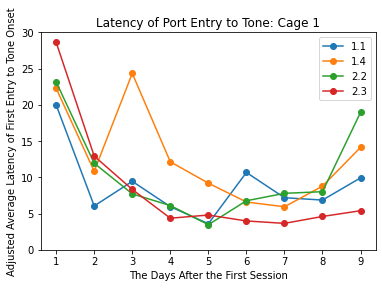

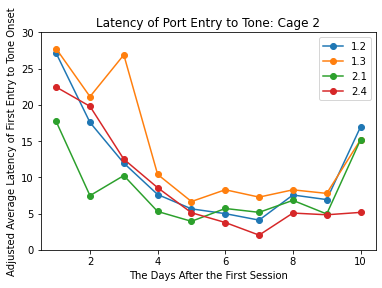

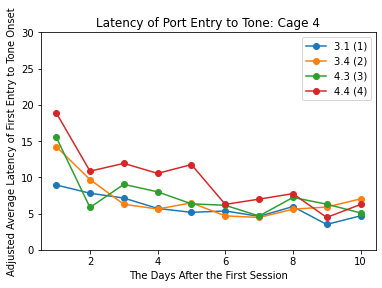

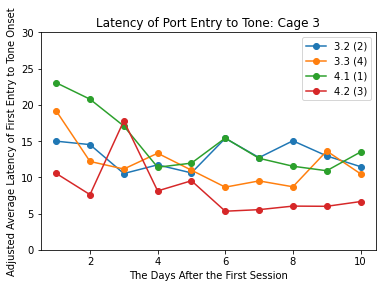

In [39]:
for cage in grouped_averaged_first_porty_entry_dataframe["cage"].unique():
    fig, ax = plt.subplots()

    cage_df = grouped_averaged_first_porty_entry_dataframe[grouped_averaged_first_porty_entry_dataframe["cage"] == cage]
    for subject in cage_df["subject"].unique():
        subject_df = cage_df[cage_df["subject"] == subject]
        
        
        
        ax.plot(subject_df["date_int"] - subject_df["date_int"].min() + 1, subject_df["latency_adjusted"], '-o', label=subject)
    
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Adjusted Average Latency of First Entry to Tone Onset")
    ax.set_title("Latency of Port Entry to Tone: Cage {}".format(cage))

    ax.set_ylim(0, 30)
    ax.legend()
    plt.savefig("./data/plots/average_latency_plots/average_port_entry_latency_cage_{}_date_20220503_20220512.png".format(cage))
    

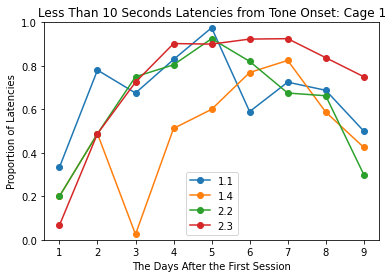

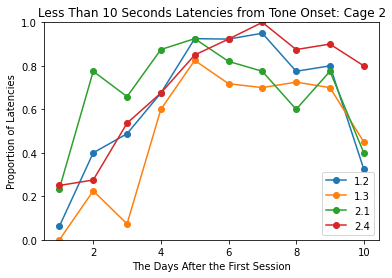

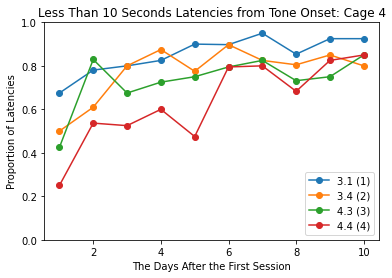

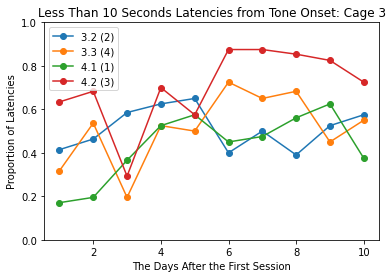

In [40]:
for cage in grouped_averaged_first_porty_entry_dataframe["cage"].unique():
    fig, ax = plt.subplots()

    cage_df = grouped_averaged_first_porty_entry_dataframe[grouped_averaged_first_porty_entry_dataframe["cage"] == cage]
    for subject in cage_df["subject"].unique():
        subject_df = cage_df[cage_df["subject"] == subject]
        
        
        
        ax.plot(subject_df["date_int"] - subject_df["date_int"].min() + 1, subject_df["latency_less_than_10_seconds"], '-o', label=subject)
    
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Proportion of Latencies")
    ax.set_title("Less Than 10 Seconds Latencies from Tone Onset: Cage {}".format(cage))

    ax.set_ylim(0, 1)
    ax.legend()
    plt.savefig("./data/plots/proportion_of_latencies_less_than_10_seconds/less_than_10_seconds_latency_proportion_cage_{}_date_20220503_20220512.png".format(cage))
    

# Getting the port entry precision

## 1. Get all the numbers that are within the duration

### 1.1 Processing the Dataframe to remove all rows with NaNs

In [41]:
example_med_pc_df = concatted_medpc_df[concatted_medpc_df["file_path"] == "./data/timestamp_dataframes/2022-05-03_14h49m_Subject 3.2 (2).txt"]

In [42]:
example_med_pc_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,71.36,64.0,399.0,0.0,60.01,71.42,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
1,71.77,144.0,399.0,0.0,140.01,84.39,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
2,84.47,234.0,399.0,0.0,230.01,85.11,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
3,107.97,314.0,399.0,0.0,310.01,116.64,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
4,157.91,489.0,399.0,0.0,385.01,158.15,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
...,...,...,...,...,...,...,...,...,...,...,...
2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
2537,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
2538,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
2539,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...


In [43]:
example_med_pc_df = example_med_pc_df.dropna(subset=("(P)Portentry", "(N)Portexit"))

In [44]:
example_med_pc_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,71.36,64.0,399.0,0.0,60.01,71.42,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
1,71.77,144.0,399.0,0.0,140.01,84.39,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
2,84.47,234.0,399.0,0.0,230.01,85.11,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
3,107.97,314.0,399.0,0.0,310.01,116.64,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
4,157.91,489.0,399.0,0.0,385.01,158.15,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
...,...,...,...,...,...,...,...,...,...,...,...
334,3620.40,NaN,NaN,0.0,NaN,3620.80,0.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
335,3625.02,NaN,NaN,0.0,NaN,3637.30,0.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
336,3644.60,NaN,NaN,0.0,NaN,3650.22,0.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...
337,3656.06,NaN,NaN,0.0,NaN,3656.84,0.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...


### 1.2 Making All the Times Into Whole Numbers

In [45]:
def scale_time_to_whole_number(time, multiplier=100):
    """
    Function used to convert times that are floats into whole numbers by scaling it. i.e. from 71.36 to 7136
    This is used with pandas.DataFrame.apply/pandas.Series.apply to convert a column of float times to integer times.

    Args:
        time: float
            - The time in seconds that something is happening
    Returns: 
        int:
            - Converted whole number time
    """
    try:
        if np.isnan(time):
            return 0
        else:
            return int(time * multiplier)
    except:
        return 0

In [46]:
example_med_pc_df["port_entry_scaled"] = example_med_pc_df["(P)Portentry"].apply(lambda x: scale_time_to_whole_number(x))
example_med_pc_df["port_exit_scaled"] = example_med_pc_df["(N)Portexit"].apply(lambda x: scale_time_to_whole_number(x))
example_med_pc_df["tone_start_scaled"] = example_med_pc_df["(S)CSpresentation"].apply(lambda x: scale_time_to_whole_number(x))

/tmp/ipykernel_147654/4182473659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_med_pc_df["port_entry_scaled"] = example_med_pc_df["(P)Portentry"].apply(lambda x: scale_time_to_whole_number(x))
/tmp/ipykernel_147654/4182473659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_med_pc_df["port_exit_scaled"] = example_med_pc_df["(N)Portexit"].apply(lambda x: scale_time_to_whole_number(x))
/tmp/ipykernel_147654/4182473659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [47]:
example_med_pc_df.head(n=25)

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path,port_entry_scaled,port_exit_scaled,tone_start_scaled
0,71.36,64.0,399.0,0.0,60.01,71.42,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,7136,7142,6001
1,71.77,144.0,399.0,0.0,140.01,84.39,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,7177,8439,14001
2,84.47,234.0,399.0,0.0,230.01,85.11,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,8447,8511,23001
3,107.97,314.0,399.0,0.0,310.01,116.64,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,10797,11664,31001
4,157.91,489.0,399.0,0.0,385.01,158.15,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,15791,15815,38501
5,204.79,584.0,399.0,0.0,485.01,205.06,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,20479,20506,48501
6,205.08,674.0,399.0,0.0,580.01,209.32,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,20508,20932,58001
7,298.49,754.0,399.0,0.0,670.01,304.61,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,29849,30461,67001
8,385.34,844.0,399.0,0.0,750.01,385.40,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,38534,38540,75001
9,385.47,944.0,399.0,0.0,840.01,395.82,1.0,0.0,20220503,3.2 (2),./data/timestamp_dataframes/2022-05-03_14h49m_...,38547,39582,84001


In [48]:
(example_med_pc_df["(N)Portexit"] - example_med_pc_df["(P)Portentry"]).mean()

2.2138938053097315

In [49]:
def get_all_port_entry_increments(port_entry_scaled, port_exit_scaled):
    """
    Gets all the numbers that are in the duration of the port entry and port exit times. 
    i.e. If the port entry was 7136 and port exit was 7142, we'd get [7136, 7137, 7138, 7139, 7140, 7141, 7142]
    This is done for all port entry and port exit times pairs between two Pandas Series

    Args:
        port_entry_scaled: Pandas Series
            - A column from a MED-PC Dataframe that has all the port entry times scaled
            (usually with the scale_time_to_whole_number function)
        port_exit_scaled: Pandas Series
            - A column from a MED-PC Dataframe that has all the port exit times scaled
            (usually with the scale_time_to_whole_number function)
    Returns: 
        Numpy array:
            - 1D Numpy Array of all the numbers that are in the duration of all the port entry and port exit times
    """
    all_port_entry_ranges = [np.arange(port_entry, port_exit+1) for port_entry, port_exit in zip(port_entry_scaled, port_exit_scaled)]
    return np.concatenate(all_port_entry_ranges)

In [50]:
example_port_entry_times = get_all_port_entry_increments(port_entry_scaled=example_med_pc_df["port_entry_scaled"], port_exit_scaled=example_med_pc_df["port_exit_scaled"])

In [51]:
example_port_entry_times[:10]

array([7136, 7137, 7138, 7139, 7140, 7141, 7142, 7177, 7178, 7179])

## 2. Make a set and see which numbers are in that set

### 2.1 Getting all the numbers from 0 to the time of the last tone plus 2000(or 20 seconds)

In [52]:
example_valid_tone_times = processing.tone.get_valid_tones(tone_pd_series=example_med_pc_df["tone_start_scaled"]).astype(int)

In [53]:
# Using the last tone and adding 2000(or 20 seconds to it)
example_experiment_interval = np.arange(example_valid_tone_times.max() + 2001)

In [54]:
example_experiment_interval

array([     0,      1,      2, ..., 372499, 372500, 372501])

### 2.2 Getting a mask of all the numbers that are within a port entry and port exit time

In [55]:
example_port_entry_mask = np.isin(example_experiment_interval, example_port_entry_times)

In [56]:
example_port_entry_mask

array([False, False, False, ..., False, False, False])

In [57]:
example_experiment_interval[np.isin(example_experiment_interval, example_port_entry_times)]

array([  7136,   7137,   7138, ..., 370393, 370394, 370395])

### 2.3 Or just using a function to do all of this for us

In [58]:
def get_inside_port_mask(max_time, inside_port_numbers):
    """
    Gets a mask of all the times that the subject is inside the port. 
    First a range of number from 1 to the number for the max time is created.
    Then, a mask is created by seeing which numbers are within the inside port duration

    Args:
        max_time: int
            - The number that represents the largest number for the time. 
                - Usually this will be the number for the last tone played.  
            - We recommend adding 2001 if you are just using the number for the last tone played
                - This is because we are looking 20 seconds before and after. 
                - And 20 seconds becomes 2000 when scaled with our method.
        inside_port_numbers: Numpy Array
            - All the increments of of the duration that the subject is within the port
    Returns: 
        session_time_increments: Numpy Array
            - Range of number from 1 to max time 
        inside_port_mask: Numpy Array
            - The mask of True or False if the subject is in the port during the time of that index
    """
    session_time_increments = np.arange(1, max_time+1)
    inside_port_mask = np.isin(session_time_increments, inside_port_numbers)
    return session_time_increments, inside_port_mask

In [59]:
max_time = example_valid_tone_times.max() + 2001

In [60]:
example_experiment_interval, example_port_entry_mask = get_inside_port_mask(max_time=max_time, inside_port_numbers=example_port_entry_times)

In [61]:
example_port_entry_mask

array([False, False, False, ..., False, False, False])

In [62]:
example_experiment_interval[example_port_entry_mask]

array([  7136,   7137,   7138, ..., 370393, 370394, 370395])

## 3. Find the Overlap between the Tone Times and the Port Entries

### 3.1 Calculating the probability that the subject is in the port for each time increment between sessions

In [63]:
tone_time_to_mask = defaultdict(dict)
example_all_tone_time_masks = []
for index, tone_start in example_valid_tone_times.iteritems():
    tone_start_int = int(tone_start)
#     print(tone_start_int)
#     print(example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000])  
    example_all_tone_time_masks.append(example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000])
    tone_time_to_mask[tone_start_int] = example_port_entry_mask[tone_start_int - 2000: tone_start_int + 2000]
np.stack(example_all_tone_time_masks)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False]])

In [64]:
tone_time_to_mask

defaultdict(dict,
            {6001: array([False, False, False, ...,  True,  True,  True]),
             14001: array([False, False, False, ..., False, False, False]),
             23001: array([False, False, False, ..., False, False, False]),
             31001: array([False, False, False, ..., False, False, False]),
             38501: array([False, False, False, ..., False, False, False]),
             48501: array([False, False, False, ..., False, False, False]),
             58001: array([False, False, False, ..., False, False, False]),
             67001: array([ True,  True,  True, ..., False, False, False]),
             75001: array([False, False, False, ..., False, False, False]),
             84001: array([False, False, False, ...,  True,  True,  True]),
             94001: array([ True,  True,  True, ..., False, False, False]),
             103001: array([False, False, False, ...,  True,  True,  True]),
             115001: array([False, False, False, ...,  True,  True,  T

In [65]:
stacked_example_all_tone_time_masks = np.stack(example_all_tone_time_masks)

In [66]:
mean_example_all_tone_time_masks = stacked_example_all_tone_time_masks.mean(axis=0)

In [67]:
mean_example_all_tone_time_masks

array([0.2195122 , 0.2195122 , 0.2195122 , ..., 0.29268293, 0.29268293,
       0.29268293])

### 3.2 Doing it with a function

In [68]:
def get_inside_port_probability_averages_for_all_increments(tone_times, inside_port_mask, before_tone_duration=2000, after_tone_duration=2000):
    """
    Calculates the average probability that a subject is in the port between sessions. 
    This is calculated by seeing the ratio that a subject is in the port at a given time increment 
    that's the same time difference to the tone with all the other sessions. 
    i.e. The time increment of 10.01 seconds after the tone for all sessions.
    
    Args:
        tone_times: list or Pandas Series
            - An array of the times that the tone has played
        inside_port_mask: Numpy Array
            - The mask where the subject is in the port based on the index being the time increment
        before_tone_duration: int
            - The number of increments before the tone to be analyzed
        after_tone_duration: int
            - The number of increments after the tone to be analyzed
    Returns: 
        Numpy Array
            - The averages of the probabilities that the subject is inside the port for all increments
    """
    result = []
    for tone_start in tone_times:
        tone_start_int = int(tone_start)
        result.append(inside_port_mask[tone_start_int - before_tone_duration: tone_start_int + after_tone_duration])
    return np.stack(result).mean(axis=0)

In [69]:
get_inside_port_probability_averages_for_all_increments(tone_times=example_valid_tone_times, inside_port_mask=example_port_entry_mask)

array([0.2195122 , 0.2195122 , 0.2195122 , ..., 0.29268293, 0.29268293,
       0.29268293])

### 3.3 Plotting all the probailities

Text(0.5, 1.0, 'Probability Inside Port for 10ms Increments 20 Seconds Before and After Tone')

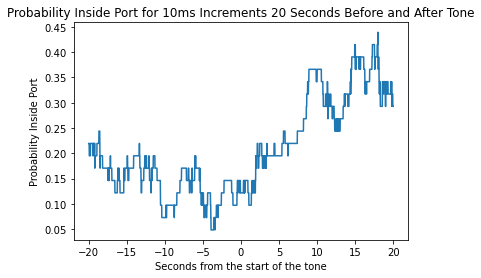

In [70]:
plt.plot(np.linspace(-20,20,4000), mean_example_all_tone_time_masks)
plt.xlabel("Seconds from the start of the tone")
plt.ylabel("Probability Inside Port")
plt.title("Probability Inside Port for 10ms Increments 20 Seconds Before and After Tone")

# 4. Plotting for Multiple Training Sessions

### 4.1 Combining Dataframes

In [71]:
concatted_medpc_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,12.34,64.0,399.0,0.0,60.01,12.39,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
1,14.60,144.0,399.0,0.0,140.01,14.79,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
2,23.95,234.0,399.0,0.0,230.01,24.88,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
3,31.83,314.0,399.0,0.0,310.01,31.90,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
4,31.99,389.0,399.0,0.0,385.01,32.09,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
...,...,...,...,...,...,...,...,...,...,...,...
2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2537,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2538,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2539,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...


In [72]:
valid_files = []
for file_path in concatted_medpc_df["file_path"].unique():
    current_medpc_df = concatted_medpc_df[concatted_medpc_df["file_path"] == file_path]
    valid_tones = processing.tone.get_valid_tones(tone_pd_series= current_medpc_df["(S)CSpresentation"])

    if not valid_tones.empty:
        
        valid_files.append(file_path)
    else:
        print("Skipped {}".format(key))

In [73]:
valid_files

['./data/timestamp_dataframes/2022-05-06_12h59m_Subject 3.4 (2).txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-05-10_14h40m_Subject 4.3 (3).txt',
 './data/timestamp_dataframes/2022-05-06_12h59m_Subject 4.3 (3).txt',
 './data/timestamp_dataframes/2022-05-04_08h43m_Subject 2.3.txt',
 './data/timestamp_dataframes/2022-05-03_12h52m_Subject 2.1.txt',
 './data/timestamp_dataframes/2022-05-04_10h11m_Subject 1.2.txt',
 './data/timestamp_dataframes/2022-05-12_10h22m_Subject 1.2.txt',
 './data/timestamp_dataframes/2022-05-06_08h37m_Subject 1.1.txt',
 './data/timestamp_dataframes/2022-05-12_10h22m_Subject 1.3.txt',
 './data/timestamp_dataframes/2022-05-03_12h52m_Subject 2.4.txt',
 './data/timestamp_dataframes/2022-05-11_10h27m_Subject 2.4.txt',
 './data/timestamp_dataframes/2022-05-07_10h47m_Subject 2.4.txt',
 './data/timestamp_dataframes/2022-05-05_10h52m_Subject 1.1.txt',
 './data/timestamp_dataframes/2022-05-09_12h43m_Subject 4.1 (1).

In [74]:
valid_files_df = concatted_medpc_df[concatted_medpc_df["file_path"].isin(valid_files)]

In [75]:
valid_files_df

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,12.34,64.0,399.0,0.0,60.01,12.39,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
1,14.60,144.0,399.0,0.0,140.01,14.79,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
2,23.95,234.0,399.0,0.0,230.01,24.88,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
3,31.83,314.0,399.0,0.0,310.01,31.90,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
4,31.99,389.0,399.0,0.0,385.01,32.09,1.0,0.0,20220506,3.4 (2),./data/timestamp_dataframes/2022-05-06_12h59m_...
...,...,...,...,...,...,...,...,...,...,...,...
2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2537,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2538,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...
2539,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220508,1.3,./data/timestamp_dataframes/2022-05-08_11h14m_...


### 4.2 Get the port probability for one mice

In [77]:
concatted_medpc_df["subject"].unique()

array(['3.4 (2)', '2.3', '4.3 (3)', '2.1', '1.2', '1.1', '1.3', '2.4',
       '4.1 (1)', '4.4 (4)', '3.3 (4)', '3.2 (2)', '1.4', '3.1 (1)',
       '2.2', '4.2 (3)'], dtype=object)

In [78]:
example_one_subject_all_days = concatted_medpc_df[concatted_medpc_df["subject"] == "4.1 (1)"]

In [79]:
example_one_subject_all_days

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(B)shockintensity,date,subject,file_path
0,10.19,64.0,399.0,0.0,60.01,15.12,1.0,0.0,20220509,4.1 (1),./data/timestamp_dataframes/2022-05-09_12h43m_...
1,35.40,144.0,399.0,0.0,140.01,35.63,1.0,0.0,20220509,4.1 (1),./data/timestamp_dataframes/2022-05-09_12h43m_...
2,35.75,234.0,399.0,0.0,230.01,35.78,1.0,0.0,20220509,4.1 (1),./data/timestamp_dataframes/2022-05-09_12h43m_...
3,35.80,314.0,399.0,0.0,310.01,35.83,1.0,0.0,20220509,4.1 (1),./data/timestamp_dataframes/2022-05-09_12h43m_...
4,35.85,389.0,399.0,0.0,385.01,36.75,1.0,0.0,20220509,4.1 (1),./data/timestamp_dataframes/2022-05-09_12h43m_...
...,...,...,...,...,...,...,...,...,...,...,...
2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220505,4.1 (1),./data/timestamp_dataframes/2022-05-05_13h40m_...
2537,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220505,4.1 (1),./data/timestamp_dataframes/2022-05-05_13h40m_...
2538,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220505,4.1 (1),./data/timestamp_dataframes/2022-05-05_13h40m_...
2539,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20220505,4.1 (1),./data/timestamp_dataframes/2022-05-05_13h40m_...


In [80]:
subject_to_date_to_average_probability = defaultdict(dict)
for subject in concatted_medpc_df["subject"].unique():
#     subject_to_date_to_average_probability["subject"] = subject
    one_subject_all_days = concatted_medpc_df[concatted_medpc_df["subject"] == subject]


    for date in one_subject_all_days["date"].unique():
        
        one_day_df = one_subject_all_days[one_subject_all_days["date"] == date].copy()
        ### Scaling all the dataframes
        one_day_df["port_entry_scaled"] = one_day_df["(P)Portentry"].apply(lambda x: scale_time_to_whole_number(x))
        one_day_df["port_exit_scaled"] = one_day_df["(N)Portexit"].apply(lambda x: scale_time_to_whole_number(x))
        one_day_df["tone_start_scaled"] = one_day_df["(S)CSpresentation"].apply(lambda x: scale_time_to_whole_number(x))
        ### All the numbers of times inside port
        one_day_entry_times = get_all_port_entry_increments(port_entry_scaled=one_day_df["port_entry_scaled"], port_exit_scaled=one_day_df["port_exit_scaled"])
        ### Getting all the valid tone times and the max tone time
        one_day_valid_tone_times = processing.tone.get_valid_tones(tone_pd_series=one_day_df["tone_start_scaled"]).astype(int)
        one_day_max_time = one_day_valid_tone_times.max() + 2001
        ### Getting a mask of all the times in the port
        one_day_experiment_interval, one_day_entry_mask = get_inside_port_mask(max_time=one_day_max_time, inside_port_numbers=one_day_entry_times)
        ### Getting the average probility
        one_day_average_all_tone_time_masks = get_inside_port_probability_averages_for_all_increments(tone_times=one_day_valid_tone_times, inside_port_mask=one_day_entry_mask)
        subject_to_date_to_average_probability[subject][date] = one_day_average_all_tone_time_masks
        ### Plotting
#         plt.plot(np.linspace(-20,20,4000), one_day_average_all_tone_time_masks)
#         plt.xlabel("Seconds from the start of the tone")
#         plt.ylabel("Probability Inside Port")
#         plt.title("Probability Inside Port for 10ms Increments 20 Seconds Before and After Tone")
#         break
#     break

In [81]:
subject_to_date_to_average_probability["3.4 (2)"]

{'20220506': array([0.125, 0.125, 0.125, ..., 0.125, 0.15 , 0.15 ]),
 '20220509': array([0.4  , 0.4  , 0.375, ..., 0.75 , 0.75 , 0.7  ]),
 '20220510': array([0.36585366, 0.36585366, 0.36585366, ..., 0.7804878 , 0.7804878 ,
        0.7804878 ]),
 '20220508': array([0.23076923, 0.23076923, 0.23076923, ..., 0.33333333, 0.33333333,
        0.35897436]),
 '20220503': array([0.075, 0.075, 0.075, ..., 0.2  , 0.2  , 0.2  ]),
 '20220504': array([0.12195122, 0.12195122, 0.12195122, ..., 0.46341463, 0.46341463,
        0.46341463]),
 '20220512': array([0.375, 0.375, 0.375, ..., 0.575, 0.575, 0.575]),
 '20220507': array([0.025, 0.025, 0.025, ..., 0.3  , 0.3  , 0.3  ]),
 '20220505': array([0.225, 0.2  , 0.15 , ..., 0.3  , 0.3  , 0.3  ]),
 '20220511': array([0.2  , 0.175, 0.175, ..., 0.4  , 0.425, 0.425])}

In [82]:
subject_to_date_to_average_probability["3.3 (4)"]

{'20220508': array([0.125, 0.125, 0.125, ..., 0.3  , 0.3  , 0.3  ]),
 '20220511': array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]),
 '20220504': array([0.02439024, 0.02439024, 0.02439024, ..., 0.12195122, 0.12195122,
        0.12195122]),
 '20220506': array([0.125, 0.125, 0.125, ..., 0.05 , 0.05 , 0.05 ]),
 '20220512': array([0.05 , 0.05 , 0.05 , ..., 0.175, 0.175, 0.175]),
 '20220507': array([0.05, 0.05, 0.05, ..., 0.1 , 0.1 , 0.1 ]),
 '20220505': array([0.02439024, 0.02439024, 0.02439024, ..., 0.04878049, 0.04878049,
        0.04878049]),
 '20220503': array([0.07317073, 0.07317073, 0.07317073, ..., 0.12195122, 0.12195122,
        0.12195122]),
 '20220510': array([0.07317073, 0.07317073, 0.09756098, ..., 0.09756098, 0.09756098,
        0.09756098]),
 '20220509': array([0.1, 0.1, 0.1, ..., 0.2, 0.2, 0.2])}

In [83]:
subject_to_cage_dict = dict(zip(metadata_df["Subject"], metadata_df["Group"]))


In [84]:
subject_to_cage_dict

{'3.4 (2)': 'Cage 4',
 '2.3': 'Cage1',
 '4.3 (3)': 'Cage 4',
 '2.1': 'Cage 2',
 '1.2': 'Cage 2',
 '1.1': 'Cage 1',
 '1.3': 'Cage 2',
 '2.4': 'Cage 2',
 '4.1 (1)': 'Cage 3',
 '4.4 (4)': 'Cage 4',
 '3.3 (4)': 'Cage 3',
 '3.2 (2)': 'Cage 3',
 '1.4': 'Cage 1',
 '3.1 (1)': 'Cage 4',
 '2.2': 'Cage 1',
 '4.2 (3)': 'Cage 3'}

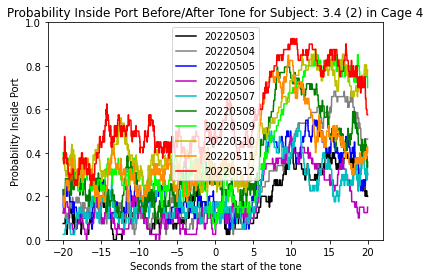

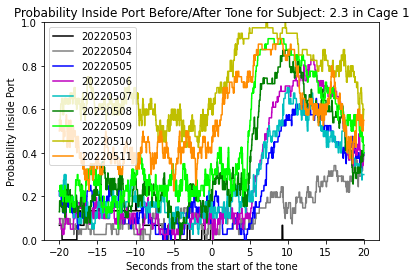

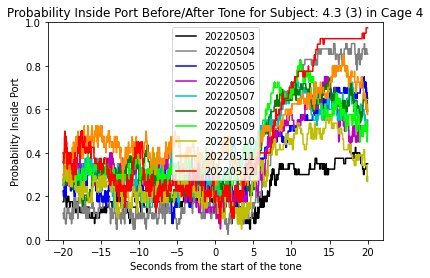

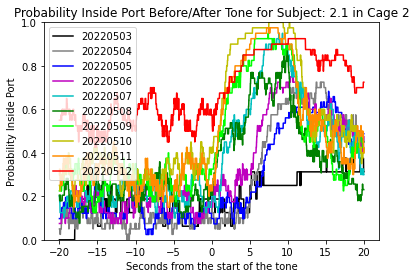

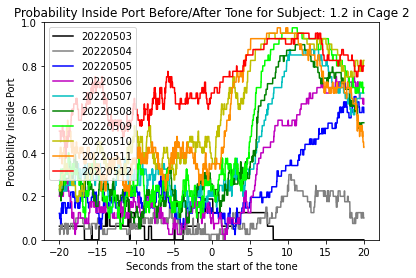

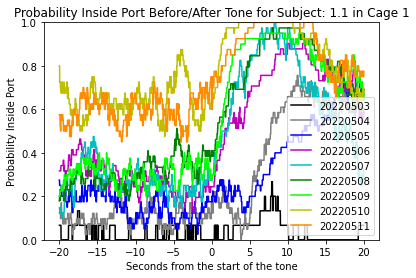

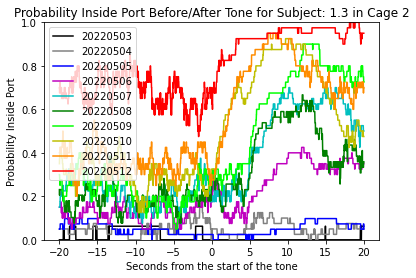

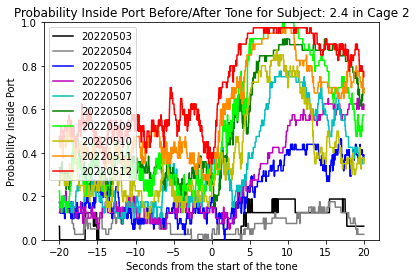

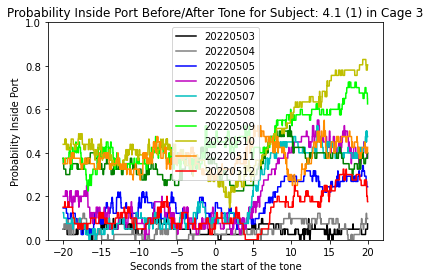

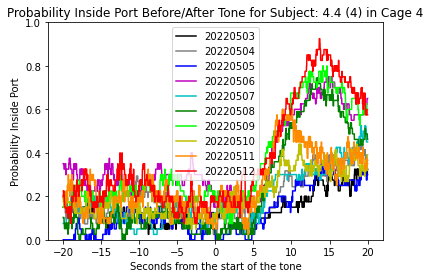

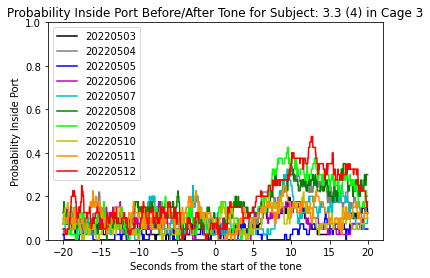

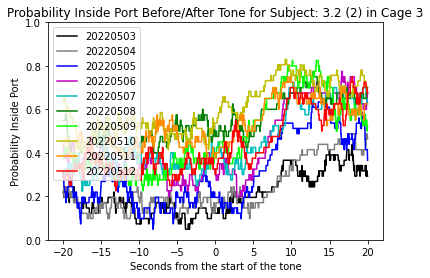

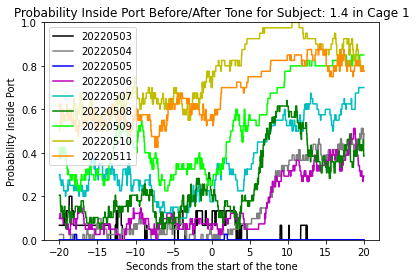

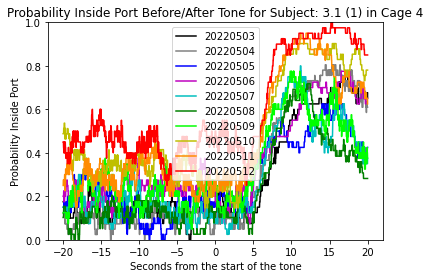

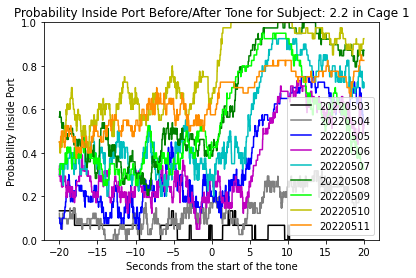

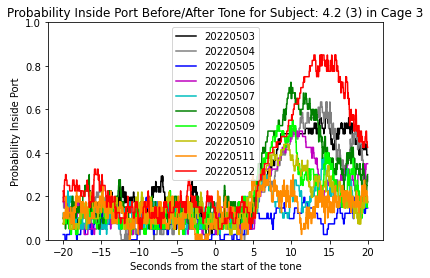

In [86]:

all_colors = ["k", "gray", "b", "m", "c","g", "lime", "y", "darkorange", "r", "deeppink"]
for subject_id in concatted_medpc_df["subject"].unique():
    fig, ax = plt.subplots()
    cage = subject_to_cage_dict[subject_id].strip("Cage").strip()
    ax.set_xlabel("Seconds from the start of the tone")
    ax.set_ylabel("Probability Inside Port")
    ax.set_title("Probability Inside Port Before/After Tone for Subject: {} in Cage {}".format(subject_id, cage))
    counter = 0

    for key in sorted(subject_to_date_to_average_probability[subject_id].keys()):
        ax.plot(np.linspace(-20,20,4000), subject_to_date_to_average_probability[subject_id][key], label=key, color=all_colors[counter])
        counter += 1
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.set_ylim(0, 1)
    ax.legend(handles, labels)
    plt.show()
    fig.savefig("./data/plots/probability_inside_port/probability_inside_port_cage_{}_subject_{}_date_20220503_20220512.png".format(cage, subject_id))

# TODO: 4. Licking Specifity Average

In [87]:
subject_to_date_to_licking_specificty = defaultdict(lambda: defaultdict(dict))
# subject_to_date_to_licking_specificty = defaultdict(dict)
for subject, all_dates in subject_to_date_to_average_probability.items():
    for date, averages in all_dates.items():
#         subject_to_date_to_licking_specificty[subject][date] = averages[0:2000].mean()
        subject_to_date_to_licking_specificty[subject][date]["-20_to_0"] = averages[0:2000].mean()
        subject_to_date_to_licking_specificty[subject][date]["0_to_10"] = averages[2000:3000].mean()

In [134]:
licking_specifity_df = pd.DataFrame.from_dict({(i,j): subject_to_date_to_licking_specificty[i][j] 
                           for i in subject_to_date_to_licking_specificty.keys() 
                           for j in subject_to_date_to_licking_specificty[i].keys()},
                       orient='index')


In [135]:
licking_specifity_df = licking_specifity_df.reset_index()
licking_specifity_df = licking_specifity_df.rename(columns={"level_0": "subject", "level_1": "date"})

In [136]:
licking_specifity_df["date_int"] = licking_specifity_df["date"].astype(int)
licking_specifity_df["cage"] = licking_specifity_df["subject"].map(subject_to_cage)

In [137]:
licking_specifity_df

,subject,date,-20_to_0,0_to_10,date_int,cage
0,3.4 (2),20220506,0.085025,0.223650,20220506,4
1,3.4 (2),20220509,0.276737,0.315450,20220509,4
2,3.4 (2),20220510,0.352720,0.422488,20220510,4
3,3.4 (2),20220508,0.230423,0.406692,20220508,4
4,3.4 (2),20220503,0.106300,0.158525,20220503,4
...,...,...,...,...,...,...
151,4.2 (3),20220504,0.091354,0.186366,20220504,3
152,4.2 (3),20220505,0.073524,0.074244,20220505,3
153,4.2 (3),20220507,0.110450,0.140500,20220507,3
154,4.2 (3),20220508,0.135225,0.299175,20220508,3


In [138]:
licking_specifity_df = licking_specifity_df.sort_values(by=["subject", "date_int"])

In [139]:
licking_specifity_df = licking_specifity_df.reset_index(drop=True)

In [140]:
licking_specifity_df.to_csv("./data/licking_specifity_1_2_3_4_date_20220503_20220512.csv")
licking_specifity_df.to_excel("./data/licking_specifity_cage_1_2_3_4_date_20220503_20220512.xlsx")

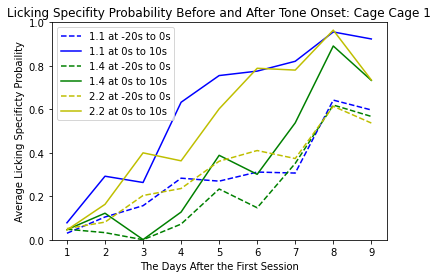

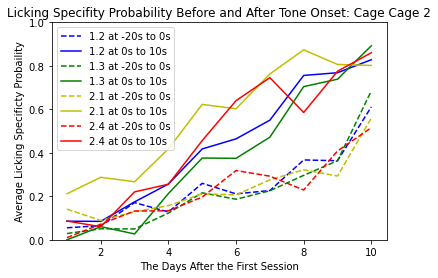

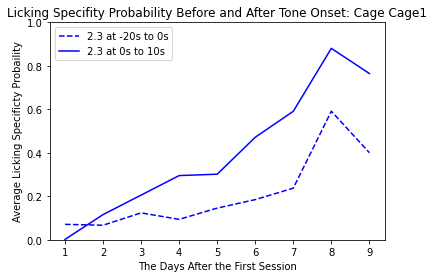

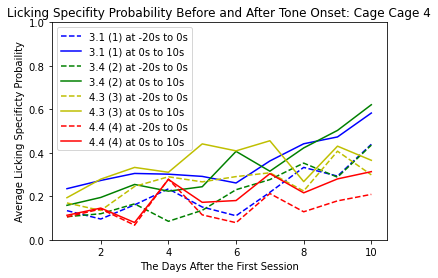

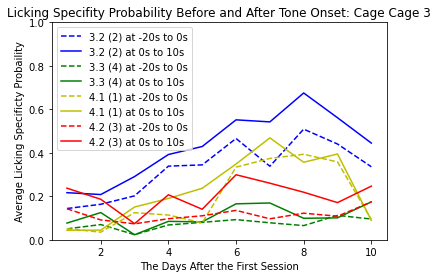

In [94]:
all_colors = ["b", "g", "y", "r"]

for cage in licking_specifity_df["cage"].unique():
    fig, ax = plt.subplots()

    cage_df = licking_specifity_df[licking_specifity_df["cage"] == cage]
    counter = 0
    for subject in cage_df["subject"].unique():
        subject_df = cage_df[cage_df["subject"] == subject]
        
        
        ax.plot(subject_df["date_int"] - subject_df["date_int"].min() + 1, subject_df["-20_to_0"], '--', color=all_colors[counter], label="{} at -20s to 0s".format(subject))
        ax.plot(subject_df["date_int"] - subject_df["date_int"].min() + 1, subject_df["0_to_10"], '-', color=all_colors[counter], label="{} at 0s to 10s".format(subject))
#         break
        counter += 1
        
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Average Licking Specificty Probaility")
    ax.set_title("Licking Specifity Probability Before and After Tone Onset: Cage {}".format(cage))

    ax.set_ylim(0, 1)
    ax.legend()
#     break
    plt.savefig("./data/plots/licking_specifity/licking_specifity_cage_{}_date_20220503_20220512.png".format(cage))
    

average(probability(t=0-10)) -average(probability(t=-20:0))